# Titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step1. Define your Questions
- 타이타닉 생존자 예측하기
- 캐글에서 데이터를 얻고 진행할 예정
- 캐글은 데이터분석 경진대회
- 문제를 정의하고, train과 test데이터 제공함.
- 학습을 통해서 예측된 데이터를 제출하면 score를 알려줘서
- score를 비교하는 플랫폼

### Step2. Data Loading
- train : 트레이닝(학습)데이터 - 정답이 포함
- test : 테스트 데이터 - 정답이 미포함. test로 예측한 이후에 나온 결과들을 제출해야함
- gender_submission : test를 통해 예측한 정답 데이터로 제출용 포맷

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/test.csv')

### Step3. Data Explore : 살펴보기

In [3]:
# 힉습데이터 보기
train.shape

(891, 12)

In [4]:
# 테스트데이터 보기
test.shape

(418, 11)

In [5]:
# 데이터의 컬럼 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 타이타닉 train데이터에서 
- 1) 전체 생존율 구하기
- 2) 생존자의 총 인원수, 사망자의 총 인원수

In [7]:
survived_rate = train.Survived.mean() * 100
print(f'생존율 = {survived_rate:.1f}%')
print('생존율 :',round(survived_rate,1),'%')

생존율 = 38.4%
생존율 : 38.4 %


In [8]:
# 생존자 : 342명, 사망자 : 549명
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# 실습하기
# 성별에 따른 생존자의 수를 구해주세요
train.loc[train.Survived==1, : ].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [10]:
# 실습하기
# 성별에 따른 사망자의 수를 구해주세요
train.loc[train.Survived==0, : ].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

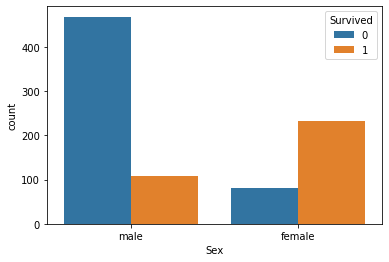

In [11]:
sns.countplot(data=train,x='Sex', hue='Survived')
# 남자가 더 많이 타고 더 많이 죽음

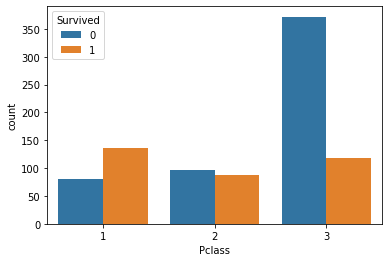

In [12]:
# 데이터 시각화하기
# 클래스에 따른 분류하기
# 1등석일수록 객실이 갑판에 있음
sns.countplot(data=train, x='Pclass', hue='Survived')

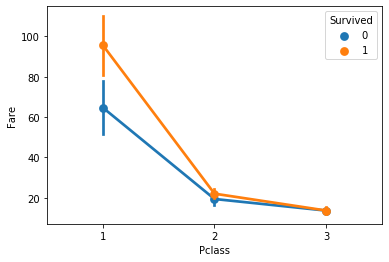

In [13]:
sns.pointplot(data=train, x='Pclass',y='Fare',hue='Survived')
# 티켓가격, 좌석에 따른 분류

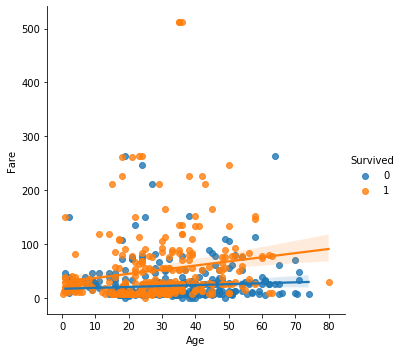

In [14]:
# 비용과 나이에 대한 분류
# - 특정 데이터 몇 개 때문에 제대로 분석해야할 데이터가 안보이는 경우가 존재함
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')

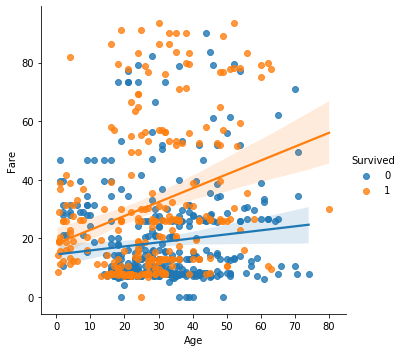

In [15]:
low_fare = train.loc[train.Fare <100,:]
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived')

In [16]:
train.loc[4:20,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


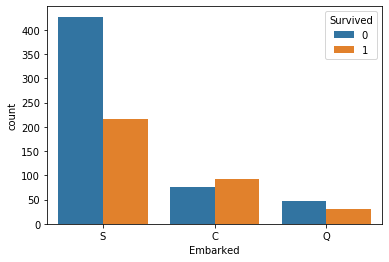

In [17]:
sns.countplot(data=train,x='Embarked',hue='Survived')
# 탑승 항구 별 생존

# Step4. Data Processing
- 데이터 가공
- 결측치, Tidy(잡동사니), noise 를 제거(혹은 채우기)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# 필요없는 컬럼 삭제
train = train.drop(['Cabin'],axis=1)

In [21]:
test = test.drop(['Cabin'],axis=1)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
# 결측치 채우기
# - Embarked를 가공하여 대부분이 S에서 탑승하였기에 S로 채운다
train['Embarked'].fillna('S', inplace=True)

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [26]:
train['Embarked'].value_counts().sum()

891

In [27]:
# test의 결측치 채우기
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [28]:
test['Fare'].fillna(0, inplace=True)

In [29]:
# 성별을 머신러닝에서 연산이 가능하도록 수치성으로 변경하기
# 람다연산 조건문 : lambda x: 참일때 if조건 else 거짓일때
train.Sex = train.Sex.apply(lambda x: 0 if x == 'male' else 1)
# 남성은 0, 여성은 1

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [31]:
# test 데이터의 성별도 0과 1로 변경하기
test.Sex = test.Sex.apply(lambda x: 0 if x == 'male' else 1)

In [32]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S
417,1309,3,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,C


In [33]:
test['Age'].fillna(round(np.mean(test['Age'])), inplace=True)
train['Age'].fillna(round(np.mean(train['Age'])), inplace=True)

In [34]:
test['Age'] = test['Age'].astype('int')
train['Age'] = train['Age'].astype('int')

# Step5. Feature Engineering
- 특성으로 특성을 도출
- SibSp : 동반한 형제, 자매, 배우자
- Parch : 동반한 부모, 자식
- 을 통하여 solo 유무를 새로운 특성으로 도출하기

In [35]:
train['family_size'] = train.SibSp + train.Parch
# family_size에 동반한 가족의 유무를 넣는다

In [36]:
train['is_solo'] = train.family_size.apply(lambda x : 1 if x == 0 else 0)
# 동반한 가족이 없으면 is_solo에 0을 넣음di

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,is_solo
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,0,1


In [38]:
# 테스트 데이터도 is_solo 추가하기
test['family_size'] = test.SibSp + test.Parch

In [39]:
test['is_solo'] = test.family_size.apply(lambda x : 1 if x == 0 else 0)

In [40]:
# 금액(Fare)별 구간을 나눠서 숫자로 변경하기
train['Fare_q'] = pd.qcut(train.Fare, 4, labels = [1, 2, 3, 4])

In [41]:
test['Fare_q'] = pd.qcut(test.Fare, 4, labels = [1, 2, 3, 4])

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,is_solo,Fare_q
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,Q,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,S,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,Q,0,1,2
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,S,0,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,S,2,0,2


# Step6. 모델 설계 및 학습
- 모델(머신러닝)에서 사용할 컬럼(feature)를 선정하기

In [43]:
feature_names = ['Pclass','Sex','is_solo','Fare_q','SibSp','Parch']

In [44]:
# 특성을 이용하여 머신러닝의 모델을 만들 데이터를 만들기
x_train = train[feature_names]
x_train.head()

,Pclass,Sex,is_solo,Fare_q,SibSp,Parch
0,3,0,0,1,1,0
1,1,1,0,4,1,0
2,3,1,1,2,0,0
3,1,1,0,4,1,0
4,3,0,1,2,0,0


In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Pclass   891 non-null    int64   
 1   Sex      891 non-null    int64   
 2   is_solo  891 non-null    int64   
 3   Fare_q   891 non-null    category
 4   SibSp    891 non-null    int64   
 5   Parch    891 non-null    int64   
dtypes: category(1), int64(5)
memory usage: 36.0 KB


In [46]:
x_test = test[feature_names]
x_test.head()

,Pclass,Sex,is_solo,Fare_q,SibSp,Parch
0,3,0,1,1,0,0
1,3,1,0,1,1,0
2,2,0,1,2,0,0
3,3,0,1,2,0,0
4,3,1,0,2,1,1


In [47]:
# y값(정답) 만들기
label_name = 'Survived'
y_train = train[label_name]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 데이터 검사

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [49]:
# 모델 만들기
model = RandomForestClassifier(n_estimators = 15)     # 15번 학습시키겠다
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# 모델을 학습시키기
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
# 예측하기
pridections = model.predict(x_test)
pridections.shape

(418,)

In [52]:
# 정확도 측정
score = cross_val_score(model, x_train, y_train, cv=20, scoring='accuracy')

In [53]:
round(np.mean(score) * 100, 2)

78.9

In [54]:
# 제출용 데이터 만들기
submit = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/gender_submission.csv', index_col = 0)
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [55]:
submit.Survived = pridections
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0


In [57]:
submit.to_csv('C:\\Users\\acorn\\LSJ\\mid_project\\titanic_ex\\result.csv')